    listing_id	Listing ID

    1	name	                        Listing Name
    2	host_id	                        Host ID
    3	host_since	                    Date the Host joined Airbnb
    4	host_location	                Location where the Host is based
    5	host_response_time	            Estimate of how long the Host takes to respond
    6	host_response_rate	            Percentage of times the Host responds
    7	host_acceptance_rate	        Percentage of times the Host accepts a booking...
    8	host_is_superhost	            Binary field to determine if the Host is a Sup...
    9	host_total_listings_count	    Total listings the Host has in Airbnb
    10	host_has_profile_pic	        Binary field to determine if the Host has a pr...
    11	host_identity_verified	        Binary field to determine if the Host has a ve...
    12	neighbourhood	                Neighborhood the Listing is in
    13	district	                    District the Listing is in
    14	city	                        City the Listing is in
    15	latitude	                    Listing's latitude
    16	longitude	                    Listing's longitude
    17	property_type	                Type of property for the Listing
    18	room_type	                    Type of room type in Airbnb for the Listing
    19	accommodates	                Guests the Listing accomodates
    20	bedrooms	                    Bedrooms in the Listing
    21	amenities	                    Amenities the Listing includes
    22	price	                        Listing price (in each country's currency)
    23	minimum_nights	                Minimum nights per booking
    24	maximum_nights	                Maximum nights per booking
    25	review_scores_rating	        Listing's overall rating (out of 100)
    26	review_scores_accuracy	        Listing's accuracy score based on what's promo...
    27	review_scores_cleanliness	    Listing's cleanliness score (out of 10)
    28	review_scores_checkin	        Listing's check-in experience score (out of 10)
    29	review_scores_communication	    Listing's communication with the Host score (o...
    30	review_scores_location	        Listing's location score within the city (out ...
    31	review_scores_value	            Listing's value score relative to its price (o...
    32	instant_bookable	            Binary field to determine if the Listing can b...

In [2]:
import pandas as pd
import numpy as np

In [3]:
listings_import = pd.read_excel(r'C:\Users\Vasiliki\Downloads\Airbnb.xlsx')
listings_import.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mΓ‚Β² Paris (Sacre CΓ…β€ur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [7]:
listings_import.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

### Cleaning the data


In [8]:
listings_import.isnull().sum()

listing_id                          0
name                              173
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

There are a lot missing values in a couple of columns but district, host_response_time, host_response_rate and host_acceptance_rate have NaN too many, so let's drop them.

In [10]:
listings_df = listings_import.drop(labels = ['district', 'host_response_time', 'host_response_rate',
                                             'host_acceptance_rate'], axis=1)
pd.set_option('display.max_columns', 100)
listings_df.head()

,listing_id,name,host_id,host_since,host_location,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",f,1.0,t,f,Buttes-Montmartre,Paris,4888668,233343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mΓ‚Β² Paris (Sacre CΓ…β€ur),10328771,2013-11-29,"Paris, Ile-de-France, France",f,1.0,t,t,Buttes-Montmartre,Paris,4888617,234515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",f,1.0,t,f,Elysee,Paris,4888112,231712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",f,1.0,t,t,Vaugirard,Paris,4884571,230584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",f,1.0,t,f,Passy,Paris,48855,226979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [11]:
listings_df.dropna()

,listing_id,name,host_id,host_since,host_location,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",f,1.0,t,f,Buttes-Montmartre,Paris,4888668,233343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mΓ‚Β² Paris (Sacre CΓ…β€ur),10328771,2013-11-29,"Paris, Ile-de-France, France",f,1.0,t,t,Buttes-Montmartre,Paris,4888617,234515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",f,1.0,t,f,Elysee,Paris,4888112,231712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",f,1.0,t,t,Vaugirard,Paris,4884571,230584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",f,1.0,t,f,Passy,Paris,48855,226979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prΓƒΒ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",f,1.0,t,t,Observatoire,Paris,4882701,231419,Entire apartment,Entire place,2,1.0,"[""Iron"", ""Heating"", ""Washer"", ""Dedicated works...",120,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",f,1.0,t,t,Buttes-Montmartre,Paris,4889309,233206,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Iron"", ""Heating"", ""Washer"", ""Hair...",60,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",f,1.0,t,t,Buttes-Montmartre,Paris,4888699,23492,Entire apartment,Entire place,2,1.0,"[""Paid parking off premises"", ""Shampoo"", ""Firs...",50,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",f,1.0,t,t,Popincourt,Paris,4886687,238123,Entire apartment,Entire place,2,1.0,"[""TV"", ""Iron"", ""Kitchen"", ""Hangers"", ""Smoke al...",105,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [12]:
listings_df = listings_df.dropna()
listings_df.isnull().sum()

listing_id                     0
name                           0
host_id                        0
host_since                     0
host_location                  0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
dtype: int64

In [13]:
listings_df.duplicated().sum()

0

#### Exploring the cities

In [15]:
listings_df['city'].unique()

array(['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney', 'Rome',
       'Hong Kong', 'Istanbul', 'Mexico City', 'Cape Town'], dtype=object)

In [16]:
#Count the number of records for each city

listings_df.groupby('city').host_id.count().sort_values(ascending = False)

city
Paris             37907
New York          24132
Sydney            20763
Rome              20155
Rio de Janeiro    14864
Mexico City       13995
Cape Town         12331
Istanbul          10388
Bangkok           10005
Hong Kong          3146
Name: host_id, dtype: int64

There are a lot of data for Paris, so let's get an insight.



## Paris

In [17]:
paris = listings_df[listings_df['city'] == 'Paris']
paris.head()

,listing_id,name,host_id,host_since,host_location,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",f,1.0,t,f,Buttes-Montmartre,Paris,4888668,233343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mΓ‚Β² Paris (Sacre CΓ…β€ur),10328771,2013-11-29,"Paris, Ile-de-France, France",f,1.0,t,t,Buttes-Montmartre,Paris,4888617,234515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",f,1.0,t,f,Elysee,Paris,4888112,231712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",f,1.0,t,t,Vaugirard,Paris,4884571,230584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",f,1.0,t,f,Passy,Paris,48855,226979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [18]:
paris.describe()

,listing_id,host_id,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3.790700e+04,3.790700e+04,37907.000000,3.790700e+04,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000,37907.000000
mean,2.212850e+07,7.755925e+07,9.718179,4.435007e+06,212849.697285,3.276677,1.359986,117.339040,5.310866,680.081120,93.468093,9.615849,9.249110,9.702641,9.727201,9.688685,9.314981
std,1.365652e+07,9.630605e+07,63.292557,1.342741e+06,64814.642004,1.686444,0.960789,207.107303,55.621490,890.529995,8.498578,0.818777,1.067211,0.745272,0.738441,0.690996,0.903704
min,2.577000e+03,2.626000e+03,0.000000,4.883000e+03,23.000000,1.000000,1.000000,8.000000,1.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,9.762488e+06,1.022919e+07,1.000000,4.884464e+06,231432.000000,2.000000,1.000000,60.000000,2.000000,30.000000,91.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,2.175014e+07,3.240280e+07,1.000000,4.886279e+06,234606.000000,3.000000,1.000000,88.000000,2.000000,1125.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,3.437806e+07,1.083232e+08,2.000000,4.887743e+06,236791.000000,4.000000,2.000000,125.000000,4.000000,1125.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.807656e+07,3.868271e+08,1105.000000,4.890129e+06,246705.000000,16.000000,50.000000,12000.000000,9999.000000,99999.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [19]:
#Group by "neighbourhood" and sorting the values from the most "crowded" airbnb areas to the least.

paris_neigh= paris.groupby('neighbourhood').host_id.count().sort_values(ascending = False)
paris_neigh

neighbourhood
Buttes-Montmartre      4404
Popincourt             3785
Enclos-St-Laurent      2924
Vaugirard              2688
Batignolles-Monceau    2361
Buttes-Chaumont        2270
Menilmontant           2244
Opera                  1875
Temple                 1827
Reuilly                1591
Passy                  1533
Observatoire           1448
Gobelins               1386
Bourse                 1293
Pantheon               1256
Hotel-de-Ville         1166
Luxembourg             1148
Palais-Bourbon          962
Elysee                  944
Louvre                  802
Name: host_id, dtype: int64

In [20]:
#Create a list with the neighbourhoods

n = []

for i in paris_neigh.index:
    n.append(i)
n

['Buttes-Montmartre',
 'Popincourt',
 'Enclos-St-Laurent',
 'Vaugirard',
 'Batignolles-Monceau',
 'Buttes-Chaumont',
 'Menilmontant',
 'Opera',
 'Temple',
 'Reuilly',
 'Passy',
 'Observatoire',
 'Gobelins',
 'Bourse',
 'Pantheon',
 'Hotel-de-Ville',
 'Luxembourg',
 'Palais-Bourbon',
 'Elysee',
 'Louvre']

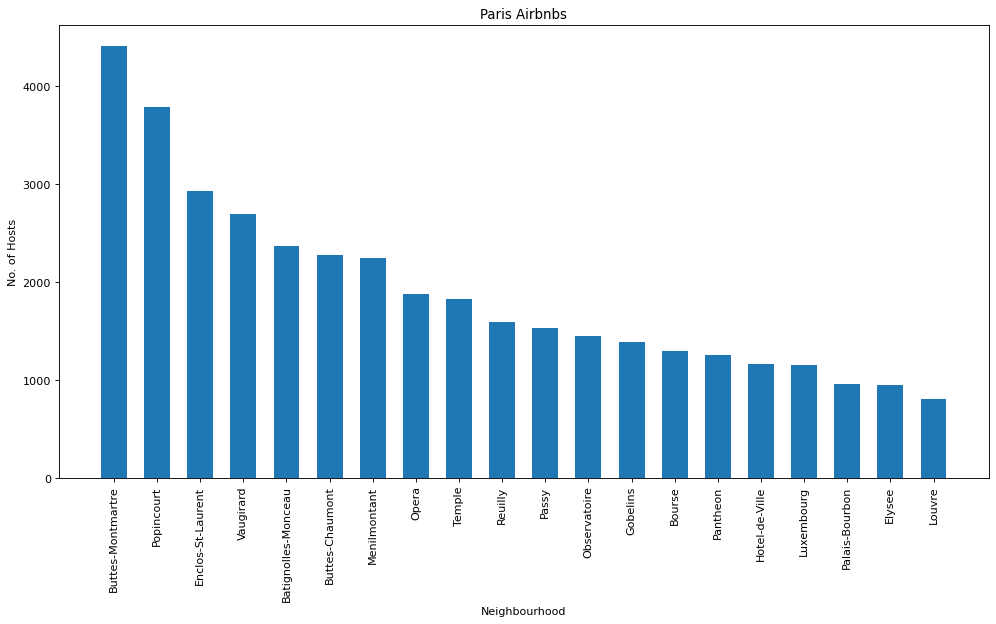

In [21]:
#Plotting the data 

import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (15, 7.5), dpi=80)

plt.xlabel('Neighbourhood')

plt.ylabel('No. of Hosts')

plt.title('Paris Airbnbs')

plt.bar(n[:], paris_neigh[:], width = 0.6)

plt.xticks(rotation='vertical')

plt.show()

In [22]:
reviews = {}

for i in n:
    reviews[i] = 0
    
for i in paris.index:
    reviews[paris['neighbourhood'][i]] += paris['review_scores_rating'][i]
    
reviews

{'Buttes-Montmartre': 412570.0,
 'Popincourt': 355760.0,
 'Enclos-St-Laurent': 274428.0,
 'Vaugirard': 251830.0,
 'Batignolles-Monceau': 220224.0,
 'Buttes-Chaumont': 211545.0,
 'Menilmontant': 210162.0,
 'Opera': 175419.0,
 'Temple': 170189.0,
 'Reuilly': 149055.0,
 'Passy': 142400.0,
 'Observatoire': 135072.0,
 'Gobelins': 129070.0,
 'Bourse': 119463.0,
 'Pantheon': 117269.0,
 'Hotel-de-Ville': 109461.0,
 'Luxembourg': 106734.0,
 'Palais-Bourbon': 90209.0,
 'Elysee': 87198.0,
 'Louvre': 75037.0}

### Room Type

In [25]:
paris.room_type.unique()

array(['Entire place', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [26]:
room = paris.groupby('room_type')['room_type'].count().sort_values(ascending=False)
room

room_type
Entire place    31819
Private room     5023
Hotel room        806
Shared room       259
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Types of Hosts')

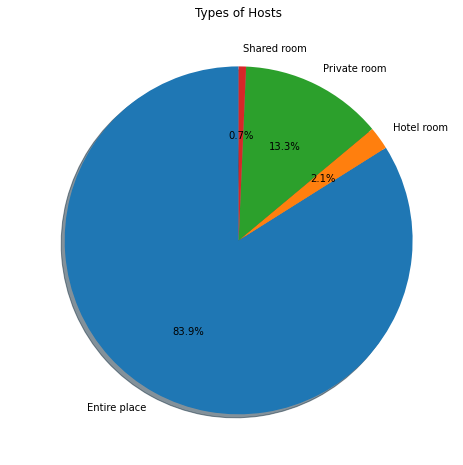

In [27]:
room.groupby(['room_type']).sum().plot(kind='pie', shadow = True, startangle=90,
                                       figsize=(8,8), autopct='%1.1f%%')

plt.ylabel(' ')
plt.title('Types of Hosts')

### Amenities

In [28]:
paris['amenities'].unique()

array(['["Heating", "Kitchen", "Washer", "Wifi", "Long term stays allowed"]',
       '["Shampoo", "Heating", "Kitchen", "Essentials", "Washer", "Dryer", "Wifi", "Long term stays allowed"]',
       '["Heating", "TV", "Kitchen", "Washer", "Wifi", "Long term stays allowed"]',
       ...,
       '["Paid parking off premises", "Shampoo", "First aid kit", "Heating", "Iron", "Kitchen", "Hair dryer", "Essentials", "Washer", "Breakfast", "Hot water", "Wifi", "Long term stays allowed", "Dedicated workspace", "Host greets you"]',
       '["TV", "Iron", "Kitchen", "Hangers", "Smoke alarm", "Cable TV", "Dedicated workspace", "Hot water", "Heating", "Shampoo", "Elevator", "Essentials", "Washer", "Carbon monoxide alarm", "Wifi"]',
       '["Shower gel", "Shampoo", "Iron", "Heating", "Washer", "Dedicated workspace", "Extra pillows and blankets", "Wifi", "Dishes and silverware", "Kitchen", "Refrigerator", "Cooking basics", "Hot water", "Essentials", "Bed linens", "Dishwasher", "Coffee maker"]'],
      

In [31]:
#Convert a string that looks like a list into an actual list

import ast 

all_amenities = []
for i in paris['amenities']:
   temp_list = ast.literal_eval(i)
   all_amenities += temp_list

    
#Create new column
paris['real_amenities'] = paris['amenities'].apply(lambda x: ast.literal_eval(x))
paris['real_amenities']

<ipython-input-31-c105f3c35498>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris['real_amenities'] = paris['amenities'].apply(lambda x: ast.literal_eval(x))


0         [Heating, Kitchen, Washer, Wifi, Long term sta...
1         [Shampoo, Heating, Kitchen, Essentials, Washer...
2         [Heating, TV, Kitchen, Washer, Wifi, Long term...
3         [Heating, TV, Kitchen, Wifi, Long term stays a...
4         [Heating, TV, Kitchen, Essentials, Hair dryer,...
                                ...                        
279707    [Iron, Heating, Washer, Dedicated workspace, E...
279708    [Shampoo, Iron, Heating, Washer, Hair dryer, E...
279709    [Paid parking off premises, Shampoo, First aid...
279710    [TV, Iron, Kitchen, Hangers, Smoke alarm, Cabl...
279711    [Shower gel, Shampoo, Iron, Heating, Washer, D...
Name: real_amenities, Length: 37907, dtype: object

In [32]:
amenities = {}

for i in paris['real_amenities'].index:
    for j in range(len(paris['real_amenities'][i])):
        if(paris['real_amenities'][i][j] not in amenities):
            amenities[(paris['real_amenities'][i][j])] = 1
        else:
            amenities[(paris['real_amenities'][i][j])] += 1
amenities

{'Heating': 36384,
 'Kitchen': 35470,
 'Washer': 30647,
 'Wifi': 36480,
 'Long term stays allowed': 30121,
 'Shampoo': 25085,
 'Essentials': 35834,
 'Dryer': 12416,
 'TV': 25344,
 'Hair dryer': 28427,
 'Bathtub': 3616,
 'Elevator': 14805,
 'Cable TV': 10043,
 'Smoke alarm': 28219,
 'Fire extinguisher': 5962,
 'Paid parking off premises': 9336,
 'Iron': 27957,
 'Hot water': 24408,
 'Hangers': 28210,
 'Dedicated workspace': 24910,
 'Host greets you': 9062,
 'Carbon monoxide alarm': 10020,
 'Dishwasher': 10489,
 'Stove': 14251,
 'Refrigerator': 19799,
 'Oven': 14945,
 'Dishes and silverware': 21055,
 'Coffee maker': 17487,
 'Cooking basics': 18336,
 'Garden or backyard': 1614,
 'Bed linens': 15883,
 'Cleaning before checkout': 1768,
 'Indoor fireplace': 2946,
 'Breakfast': 4939,
 'First aid kit': 6289,
 'Air conditioning': 3585,
 'Luggage dropoff allowed': 6646,
 'Microwave': 15459,
 'Single level home': 1977,
 'Patio or balcony': 3801,
 'Extra pillows and blankets': 7808,
 'Private entra

In [38]:
new_amen = sorted(amenities.items(), key = lambda x: x[1])
new_amen[-50:]

[('Free street parking', 1704),
 ('Cleaning before checkout', 1768),
 ('Single level home', 1977),
 ('High chair', 2069),
 ('Crib', 2331),
 ('Children’s books and toys', 2408),
 ('Pack ’n Play/travel crib', 2574),
 ('Pocket wifi', 2674),
 ('Ethernet connection', 2936),
 ('Lockbox', 2943),
 ('Indoor fireplace', 2946),
 ('Shower gel', 3217),
 ('Air conditioning', 3585),
 ('Bathtub', 3616),
 ('Patio or balcony', 3801),
 ('Breakfast', 4939),
 ('Private entrance', 5535),
 ('Fire extinguisher', 5962),
 ('First aid kit', 6289),
 ('Luggage dropoff allowed', 6646),
 ('Extra pillows and blankets', 7808),
 ('Host greets you', 9062),
 ('Paid parking off premises', 9336),
 ('Carbon monoxide alarm', 10020),
 ('Cable TV', 10043),
 ('Dishwasher', 10489),
 ('Dryer', 12416),
 ('Stove', 14251),
 ('Elevator', 14805),
 ('Oven', 14945),
 ('Microwave', 15459),
 ('Bed linens', 15883),
 ('Coffee maker', 17487),
 ('Cooking basics', 18336),
 ('Refrigerator', 19799),
 ('Dishes and silverware', 21055),
 ('Hot wate